<a href="https://colab.research.google.com/github/sakshipatel2702/Machine_Learning/blob/main/Assign04_Sakshi_N01551583.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment04_Sakshi_N01551583**

##Step - 1

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
%cd /content/drive/MyDrive/Assign04

/content/drive/MyDrive/Assign04


##Step-2

In [209]:
data = pd.read_csv('Mall_Customers.csv')

In [210]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [211]:
type(data)

pandas.core.frame.DataFrame

In [212]:
X = data.iloc[:,[3,4]].values
print(X)


[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

##Step-3

#### *Note: I have performed here Elbow Method using KMeans Clustering to find out what would be the optimal value to take for min_samples so here we obtained 5 cluster using Elbow method hence in the next step in dbscan clustering we are using value 5 in the min_samples.*

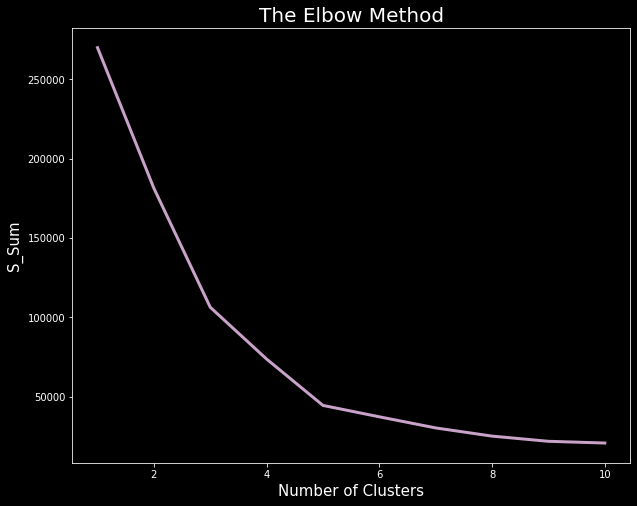

In [213]:
from sklearn.cluster import KMeans
s_sum = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    s_sum.append(kmeans.inertia_) 
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), s_sum, lw = 3, color = '#C8A2C8')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('S_Sum', fontsize =15 )
plt.show()



###Performed DBSCAN clustering on the dataset

In [214]:
from sklearn.cluster import DBSCAN

In [215]:
dbscan = DBSCAN(eps=12, min_samples=5)
labels = dbscan.fit_predict(X)

#### *Note: We are making a variable named labels here in which we can check the number of clusters as well as noice(if any) in the dataset by using the method fit_predict and then we are calling unique method of numpy to check the number of clusters and as seen below we got the output of [-1,0,1,2] so we can understand that we are getting 3 clusters and -1 indicates noice in the data*

In [216]:
np.unique(labels)

array([-1,  0,  1,  2])

### Visualize the clusters

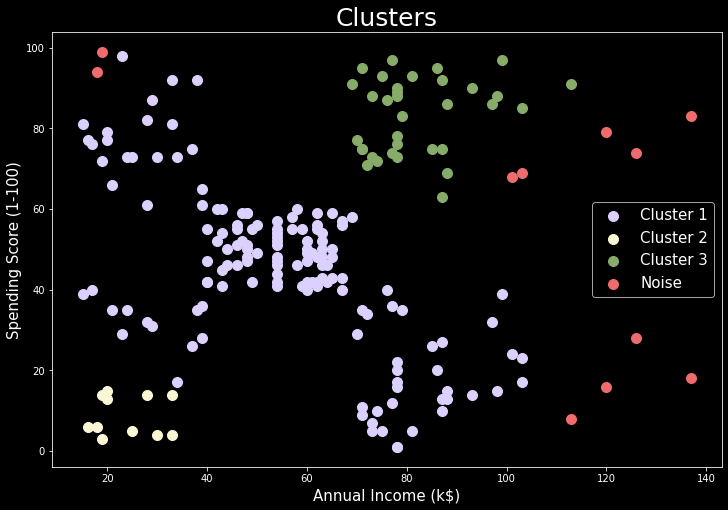

In [217]:
plt.figure(figsize = (12,8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = '#dcd0ff', label = 'Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = '#fbf7d5', label = 'Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = '#87ab69', label = 'Cluster 3')
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s = 100, c = '#ee6b6e', label = 'Noise')

plt.title('Clusters', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)
plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


## Step-4

### Provide Complete analysis of DBSCAN clustering algorithm. 

A density-based clustering technique called DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clusters together points that are closely spaced apart. The 'min samples' parameter is the minimum number of samples in a neighbourhood for a location to be considered a core point, while the 'eps' parameter is the maximum distance between two samples for them to be regarded to be in the same neighbourhood.

In this case we have found min_clusters values as 5 by using the elbow method which showed us the optimal number of clusters we should take for this data and eps was 12 due to which we got values [-1, 0, 1, 2] which shows 3 different clusters and -1 as a noise in the data.

This is a thorough analysis of the Python DBSCAN clustering technique using data on mall customers.

## Step-5

### Evaluate clustering performance using CH-Index and Silhouette score.

In [218]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, labels)

47.683807818094614

In [219]:
labels = dbscan.labels_
silhouette_score = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.3200802658739474


## Step-6

### Compare DBSCAN clustering with K-means clustering based on your results.

#### *Note: I have performed K-Means Clustering here first to find th value of y_pred so that we can compare both the clusters that are obtained using DBScan and K-Means.*

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_pred = kmeans.fit_predict(X)

kmeans.cluster_centers_



array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
dbscan = DBSCAN(eps=12)
y_kmeans = kmeans.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)

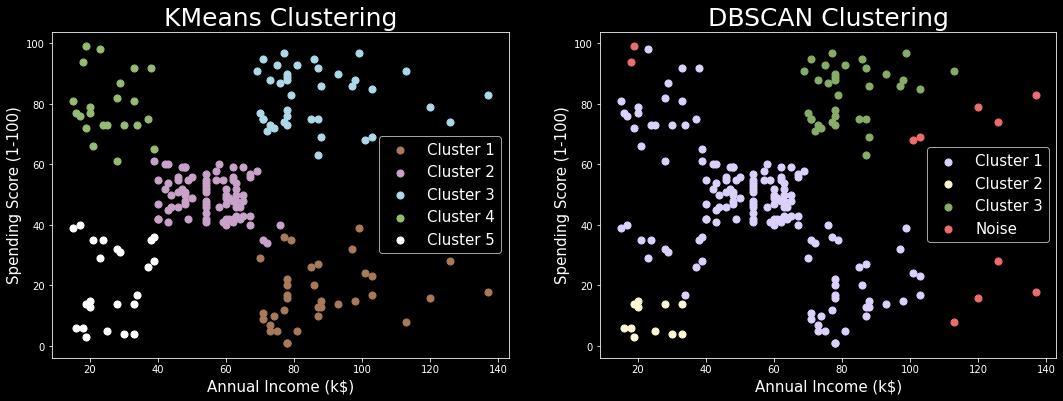

In [133]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = '#A67A5B', label = 'Cluster 1')
ax[0].scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = '#C8A2C8', label = 'Cluster 2')
ax[0].scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = '#ADD8E7', label = 'Cluster 3')
ax[0].scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 50, c = '#95BB72', label = 'Cluster 4')
ax[0].scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = 'white', label = 'Cluster 5')
ax[0].set_title('KMeans Clustering', fontsize = 25)
ax[0].set_xlabel('Annual Income (k$)', fontsize = 15)
ax[0].set_ylabel('Spending Score (1-100)', fontsize = 15)
ax[0].legend(fontsize = 15)


ax[1].scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = '#dcd0ff', label = 'Cluster 1')
ax[1].scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = '#fbf7d5', label = 'Cluster 2')
ax[1].scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = '#87ab69', label = 'Cluster 3')
ax[1].scatter(X[labels == -1, 0], X[labels == -1, 1], s = 50, c = '#ee6b6e', label = 'Noise')
ax[1].set_title('DBSCAN Clustering', fontsize = 25)
ax[1].set_xlabel('Annual Income (k$)', fontsize = 15)
ax[1].set_ylabel('Spending Score (1-100)', fontsize = 15)
ax[1].legend(fontsize = 15)
plt.show()

